In [1]:
from tensorflow import keras
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
# Decode back to english
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [3]:
# Multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# One-hot encoding for the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [15]:
# Define the model
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [16]:
# Compoling the model
model.compile(optimizer="rmsprop", 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [17]:
# Separate validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [18]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 2.7533 - accuracy: 0.5060 - val_loss: 1.8596 - val_accuracy: 0.5950
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.5754 - accuracy: 0.6626 - val_loss: 1.4144 - val_accuracy: 0.6820
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.2284 - accuracy: 0.7343 - val_loss: 1.2283 - val_accuracy: 0.7260
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 1.0156 - accuracy: 0.7790 - val_loss: 1.1182 - val_accuracy: 0.7500
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8489 - accuracy: 0.8126 - val_loss: 1.0329 - val_accuracy: 0.7710
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.7123 - accuracy: 0.8413 - val_loss: 0.9761 - val_accuracy: 0.7900
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5958 - accuracy: 0.8695 - val_loss: 0.9637 - val_accuracy: 0.7840
Epoch 8/20
16

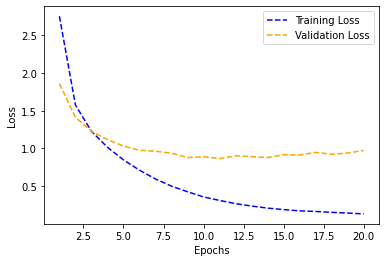

In [19]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "blue", linestyle='dashed', label="Training Loss")
plt.plot(epochs, val_loss_values, "orange", linestyle='dashed', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

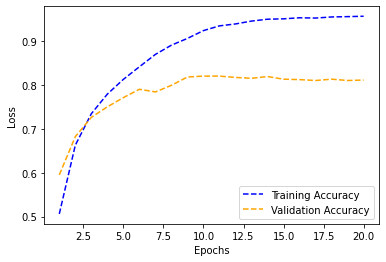

In [20]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "blue", linestyle='dashed', label="Training Accuracy")
plt.plot(epochs, val_acc, "orange", linestyle='dashed', label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()